In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data = load_wine()

In [3]:
df = pd.DataFrame(data.data , columns = data.feature_names)
df["target"] = data.target

In [4]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<Axes: >

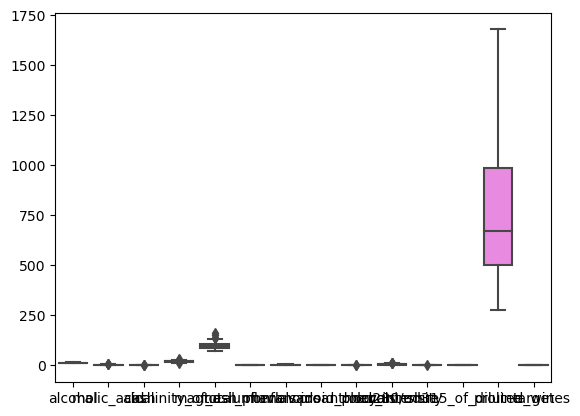

In [9]:
plt.plot(figure=(15,10))
sns.boxplot(df)

In [10]:
x= df.drop("target",axis = 1)
y = df["target"]

In [11]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=80)

# scaling

In [13]:
sc = StandardScaler()

In [14]:
x_train = sc.fit_transform(x_train,y_train)
x_test = sc.transform(x_test)

In [15]:
lr = LogisticRegression()

In [16]:
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred_train = lr.predict(x_train)


In [19]:
result =pd.DataFrame({"actual":y_train,"predicted":y_pred_train})
result

,actual,predicted
12,0,0
18,0,0
58,0,0
115,1,1
60,1,1
...,...,...
3,0,0
50,0,0
10,0,0
166,2,2


In [23]:
##training accuracy 
confusion =confusion_matrix(y_train,y_pred_train)
classification = classification_report(y_train,y_pred_train)
accuracy = accuracy_score(y_train,y_pred_train)
print("confusion:",confusion)
print("classificationL:",classification)
print("Accuracy :",accuracy)

confusion: [[41  0  0]
 [ 0 63  0]
 [ 0  0 38]]
classificationL:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

Accuracy : 1.0


In [26]:
y_pred_test=lr.predict(x_test)

In [27]:
result =pd.DataFrame({"actual":y_test,"predicted":y_pred_test})
result

,actual,predicted
88,1,1
23,0,0
28,0,0
5,0,0
171,2,2
161,2,2
40,0,0
53,0,0
140,2,2
117,1,1


In [30]:
##accuracy testing dataset

confusion =confusion_matrix(y_test,y_pred_test)
classification = classification_report(y_test,y_pred_test)
accuracy = accuracy_score(y_test,y_pred_test)
print("confusion:",confusion)
print("classificationL:",classification)
print("Accuracy :",accuracy)


confusion: [[18  0  0]
 [ 0  8  0]
 [ 0  0 10]]
classificationL:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy : 1.0


                                               Good working model